# Comparison of the Power emitted by the body, based on temperature from the thermocouple and the Power received by the thermal camera

## 0. Imports

In [1]:
import numpy as np
import sympy as smp
import datetime
import matplotlib.pyplot as plt
import pandas as pd

## 1. Numerical Integration Functions

### 1.1. The Trapezoidal Integration Method
We want to define a function that performs the approximation using the Trapezoidal rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{2} \Big( f (x_0) + 2 f (x_1) + 2 f (x_2) + \dots + 2 f (x_{N-1}) + f (x_N) \Big)$$
where 
$$x_k = x_{k-1} + \frac{x_N - x_0}{N}$$
and 
$$\Delta x = \frac{x_N - x_0}{N}$$

In [2]:
##################################
# Define the Trapezoidal integraion
##################################
# Copied from stack overflow but fairly simple

def trapezoidal(f, x_0, x_N, N):
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/2.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        x_k = x_0 + i * delta_x
        sum += f(x_k)

    # For x_N
    sum += f(x_N)/2.0
    
    sum = sum * delta_x
    
    return sum

### 1.1.1 Tests for the trapezoidal function.
We check the following integrals
$$\displaystyle \int_{1}^{2} e^x d x = e^2 - e^1 \approx 4.67077$$
$$\displaystyle \int_{2}^{3} x e^x d x = 2 e^3 - e^2 \approx 32.78202$$
$$\displaystyle \int_{2}^{3} x^3 d x = \frac{3^4 - 2^4}{4} = 16.25 $$

In [3]:
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = trapezoidal(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = trapezoidal(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = trapezoidal(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774659702784
Integral 2 = 32.782022595359464
Integral 3 = 16.250001250000008


### 1.2. The Simpson 1/3 Integration Method
We want to define a function that performs the approximation using Simpson's 1/3 rule
$$\displaystyle \int_{x_0}^{x_N} f (x) d x \approx \frac{\Delta x}{3} \Big( f (x_0) + 4 f (x_1) + 2 f (x_2) + 4 f (x_3) + 2 f (x_4) + \dots + 4 f (x_{N-3})+ 2 f (x_{N-2}) + 4 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is even!}$

In [4]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_13(f, x_0, x_N, N):

    if N % 2 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 2 (even)')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += f(x_0)/3.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%2 == 1: 
            sum += 4/3.0 * f(x_0 + i * delta_x)
        else:
            sum += 2/3.0 * f(x_0 + i * delta_x)

    # For x_N
    sum += f(x_N)/3.0

    sum = sum * delta_x
    
    return sum

### 1.2.1 Tests for Simpson's 1/3 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [5]:
#######################################
#### Remember N needs to be even ##############
######################################
N = 1000

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_13(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_13(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_13(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471628
Integral 2 = 32.78201774744518
Integral 3 = 16.250000000000014


### 1.3. The Simpson 3/8 Integration Method
We want to define a function that performs the approximation using Simpson's 3/8 rule
$$\displaystyle \int_{x_0}^{x_1} f (x) d x \approx \frac{3 \Delta x}{8} \Big( f (x_0) + 3 f (x_1) + 3 f (x_2) + 2 f (x_3) + 3 f (x_4) + 3 f (x_5) + 2 f (x_6) + \dots + 3 f (x_{N-5}) + 3 f (x_{N-4}) + 2 f (x_{N-3}) + 3 f (x_{N-2})+ 3 f (x_{N-1}) + f (x_N) \Big)$$
where 
$x_k$ and $\Delta x$ are the same as that in Trapezoidal rule (Section 1.1) and $N \: \textbf{is divisible by 3!}$

In [6]:
##################################
# Define the Simpson's 1/3 integraion
##################################
# Modified from trapezoidal

def Simpson_38(f, x_0, x_N, N):

    if N % 3 != 0:
        raise Exception('N (the number of intervals) needs to be divisible by 3')
        
    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    sum += 3 * f(x_0)/8.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        if i%3 != 0: 
            sum += 3 * 3 * f(x_0 + i * delta_x) / 8.0
        else:
            sum += 3 * 2 * f(x_0 + i * delta_x) / 8.0

    # For x_N
    sum += 3 * f(x_N)/8.0

    sum = sum * delta_x
    
    return sum

### 1.3.1 Tests for Simpson's 3/8 rule.
We do the calculations for the same expressions as that for the Trapezoidal rule (Section 1.1, 1.1.1)

In [7]:
#######################################
#### Remember N needs to be divisible by 3 ##############
######################################
N = 9999

#####################################
#### TEST 1 ########################
#####################################

test_1_string = r'''
    $$\displaystyle \int_{1}^{2} e^x d x =$$
'''

def integrand_1(x):
    return np.exp(x)

test_1_value = Simpson_38(integrand_1, 1, 2, N)

# print(f'{test_1_string} {test_1_value}')
print(f'Integral 1 = {test_1_value}')

#####################################
#### TEST 2 ########################
#####################################

test_2_string = r'''
    $$\displaystyle \int_{2}^{3} x e^x d x = $$
'''

def integrand_2(x):
    return x*np.exp(x)

test_2_value = Simpson_38(integrand_2, 2, 3, N)

# print(f'{test_2_string} {test_2_value}')
print(f'Integral 2 = {test_2_value}')



#####################################
#### TEST 3 ########################
#####################################

test_3_string = r'''
    $$\displaystyle \int_{2}^{3} x^3 d x = $$
'''

def integrand_3(x):
    return x**3

test_3_value = Simpson_38(integrand_3, 2, 3, N)

# print(f'{test_3_string} {test_3_value}')
print(f'Integral 3 = {test_3_value}')


####################################
#### LOOKS GOOD! ##################
###################################

Integral 1 = 4.670774270471601
Integral 2 = 32.782017747444755
Integral 3 = 16.24999999999996


## 2. Numerical integration for Blackbody

### 2.1 Expression for Planck's Law
I was confused by $2 \pi$ and factors of $c$'s and the various quantities discussed in representation of the Planck distribution. To avoid confusion, now I am following the notaion and expressions used in:

$\textbf{6. Electromagnetic raditaion. AST1100 – Introduction to astrophysics, Lecture Notes. University of Oslo}$

$$\displaystyle B(\nu, T) = \frac{2 h \nu^3}{c^2} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h \nu}{k_B T}\right) - 1}$$

The quantity $B(\nu, T)$, $\textbf{The Spectral Intensity}$ is defined such that,
$$\Delta E = B(\nu) \mathrm{cos} \theta \Delta \nu \Delta A \Delta \Omega \Delta t$$

is the small energy passing through a small area $\Delta A$ into a small solid
angle $\Delta \Omega$ per small time interval $\Delta t$ in the small frequency range $\left[\nu, \nu + \Delta \nu \right]$. Intensity is measured in units of W m$^{-2}$ sr$^{-1}$ Hz$^{-1}$

Some other quantities are often defined.
1. Flux (or total Flux)

$$F = \frac{d E}{d A \: d t}$$
is the total energy received per area per time.

2. Flux per frequency

$$F (\nu) = \frac{d E}{d A \: d t \: d \nu}$$
is the flux at a certain frequency.

3. Luminosity
$$F = \frac{d E}{d t}$$
is the energy received per time; i.e. the power, which should be the quantity most useful to us.

4. Luminosity per frequency
$$F = \frac{d E}{d t \: d \nu}$$
is the luminosity at a certain frequency.

The quantity $B(\lambda, T)$, The Spectral Intensity as a function of the wavelength is obtained from $B(\nu, T)$, and is given by
$$\displaystyle B(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\displaystyle \mathrm{exp} \: \left(\frac{h c}{\lambda k_B T}\right) - 1}$$ 
the units for which is given by  W m$^{-2}$ sr$^{-1}$ m$^{-1}$
$$\Delta E = B(\lambda) \mathrm{cos} \theta \Delta \lambda \Delta A \Delta \Omega \Delta t$$

### 2.2 Defining the Constants
Let's take the following values.
$$h = 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1}$$
taken from the Wikipedia article on: Planck Constant 
$$c = 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} $$
taken from the  Wikipedia article on: Speed of Light
$$k_B = 1.380649 \times 10^{-23} \: \mathrm{J \: K}^{-1}$$
taken from the Wikipedia article on: Boltzmann constant 

Two radiation constants are defined to make the simplifications. It seems that the constants are defined to make simplifications in the wavelength parametrization. Let's index them with lambda subscript.

The first radiation constant
$$c_{1\lambda} = 2 h c^2 = 2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times  \left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 = 1.1910429723971884 \times 10^{-16} \: \mathrm{J \: s}^{-1} \: \mathrm{m}^2$$

The second radiation constant
$$c_{2\lambda} = \frac{h c}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} \times 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1}}{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} = 1.4387768775039337 \times 10^{-2} \: \mathrm{m \: K}$$

Likewise we can define two constants for the frequency parametrization, and use a nu subscript.

The first radiation constant
$$c_{1\nu} = \frac{2 h}{c^2} = \frac{2 \times 6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{\left( 2.99792458 \times 10^{8} \: \mathrm{m \: s}^{-1} \right)^2 }= 1.4744994647625417 \times 10^{-50} \: \mathrm{J \: m}^{-2} \: \mathrm{s}^3$$

The second radiation constant
$$c_{2\nu} = \frac{h}{k_B} = \frac{6.62607015 \times 10^{-34} \: \mathrm{J \: Hz}^{-1} }{1.380649 \times 10{-23} \: \mathrm{J \: K}^{-1}} =  4.799243073366221 \times 10^{-11} \: \mathrm{K \: s}^{-1}$$

In [8]:
#########################
# 1. Planck Constant ###
#########################
h = 6.62607015 * (10**(-34))

##########################
# 2. Speed of Light ####
##########################
c = 2.99792458 * (10**(8))

##########################
# 3. Boltzmann constant
#########################
k_B = 1.380649 * (10**(-23))

###########################
# 4. First radiation constant in wavelength(lambda) parametrization
###########################
c_1_lambda = 2 * h * c**2

###########################
# 5. Second radiation constant in wavelength(lambda) parametrization
###########################
c_2_lambda =  h * c / k_B

###########################
# 6. First radiation constant in frequency(nu) parametrization
###########################
c_1_nu = 2 * h / (c**2)

###########################
# 7. Second radiation constant in frequency(nu) parametrization
###########################
c_2_nu =  h / k_B

### 2.3 Integration using symbolic substitution
In this section, we will try to use symbolic substitution to do the integration. We find out soon that it takes too long and we will not use it. However, if we could, symbolic substitution would make handling of expressions, especially when we have multiple emissivity models, much simpler.

In [9]:
# Define symbolic variables
T_couple = smp.Symbol('T_couple')
lambda_ = smp.Symbol('lambda_')

In [10]:
# Define the expression for Intensity given by Planck's law
B_lambda_T = (c_1_lambda / (lambda_ **5 )) * (1/( smp.exp(c_2_lambda/ (lambda_ * T_couple)) - 1) )

In [11]:
# Let's see what the expression looks like
B_lambda_T

1.19104297239719e-16/(lambda_**5*(exp(0.0143877687750393/(T_couple*lambda_)) - 1))

#### 2.3.1 Read Dummy Data
For now, we will read the dummy data file, GlobalTemperaturesRefined.csv which has 1 column of data consisting of the first column from the dataset https://github.com/sn2606/Global-Temperature-Time-Series/blob/master/GlobalTemperatures.csv , after the NaN values are droppped off.

##### Later we will define function to handle the data and integrate it into a pipeline. 

In [12]:
# Read the data from a csv file
T_couple_s = np.genfromtxt('GlobalTemperaturesRefined.csv', delimiter=',')

In [13]:
# Let's see what the data looks like
T_couple_s

array([ 3.034,  3.083,  5.626, ..., 10.801,  7.433,  5.518])

Let's assume that the data from one thermocouple will be this way. The data from multiple thermocouples could be separated into this format.

#### 2.3.2 Plug in the temperatures in the expression for the Intensity
We will now plug in the temperature data that we read from the file, into the expression for the Intensity. 
This will leave us with an expression in the wavelength, $\lambda$.
Since, we will do this for a list of temperatures, we will get a list of expressions for Intensity.

In [14]:
# Create and empty list that will hold a list of expressions for Intensity with the temperatures plugged in. 
# Wavelength is yet to be plugged in. The symbolic variable: lambda_ , represents the wavelength
# The temperatures that we read from the file, above
B_lambda_T_s = []
# For each temperature
for i in range(np.size(T_couple_s)):
    # subtitute the value of the temperature in the expression for Intensity
    B_lambda_T_s.append(B_lambda_T.subs(T_couple, T_couple_s[i]))

In [15]:
# Let's see what the list of expressions looks like. 
B_lambda_T_s

[1.19104297239719e-16/(lambda_**5*(exp(0.00474217823831224/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0046668079062729/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00255737091628854/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00169467241166541/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00124321859284882/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00111214105086491/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00090671595506928/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.000975441950850125/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0012606473998983/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00225974065887221/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00519039277598822/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.00576664079159893/lambda_) - 1)),
 1.19104297239719e-16/(lambda_**5*(exp(0.0149405698598539/lambda_) - 1)),
 1.19104297239719e-16/(lamb

In [16]:
# Let's also check the length of the list
np.size(B_lambda_T_s)

3180

#### 2.3.3 Integrate over the wavelengths
We will now integrate the expressions with respect to the wavelength, from some $\lambda_0$ to $\lambda_1$.
[$\lambda_0, \lambda_1$] is the bandwidth or sensitivity range of our thermal camera. 

1. $\textbf{Note: If the thermal camera has a non-trivial Responsivity}$,
i.e. power at various wavelengths is not detected in the same proportion, we will need to weight the expressions above with the responsivity curve of the thermal camera, $R(\lambda)$

2. The integration will produce values of integrated intensity or total flux per solid angle, for a Blackbody. We will later need to weight the expressions with various emissivity models, before integration to get the integrated intensities for a non Blackbody. 

In [17]:
# We need a function that for each expression of B in the list B_lambda_T_s, in terms of the wavelength, ...
# converts it into a function that takes a wavelength value and returns a value for B at that wavelength, which we need during integration
def evaluate_to_apply(sympy_expression):
    '''
    This function takes in a sympy expression in the varaible lambda_ and 
    returns a function that substitutes the value for lambda_ for a given argument.
    '''
    return (lambda x : sympy_expression.subs(lambda_, x))

In [18]:
# Let's see how this works

# Define an empty list that will contain the integrated values of B over the range [lambda_0, lambda_1] at each temperature
B_lambda_T_s_integrated = []
# Let's say the bandwidth of sensivity of the thermal camera is [700 nm, 1 mm] for now
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
# Define the number of points for integration
N = 10 **(0) 
# To check how long it takes, let's get the time before we do the integration
start_time = datetime.datetime.now()
# For each expression in the list of B_lambda_T_s
for i in range(np.size(B_lambda_T_s)):
    # Append to the list of integrated B values: B_lambda_T_s_integrated , the values obtained by using the trapezoidal integration function
    B_lambda_T_s_integrated.append(trapezoidal(evaluate_to_apply(B_lambda_T_s[i]), lambda_0, lambda_1, N))
# Check the time afte it is done
finish_time = datetime.datetime.now()
# Let's check how long it took
print(finish_time - start_time)
# It takes 3 seconds for 10 integration points to do the integration at 3180 temperature values.
# This is much longer than what we want, especially if you want to do real time integration.
# With just 10 points for integration, it takes 20 seconds to run the integration at 3180 points. 

0:00:03.495997


It akes about 20 seconds to run integration for 3180 temperature values, using just 10 integration points. This is not good, because we would like to use at least 1000 points, which would take some minutes to run this program.
#### So we abandon the idea of using symbolic substitution for now, and do direct substitutions in the next section.

In [19]:
# But before that let's have a look at the values for intensity that we get after the integration
B_lambda_T_s_integrated

[5.23431924599308e-7,
 5.64796878237166e-7,
 4.99970044675603e-6,
 1.33875242802294e-5,
 2.41230814652736e-5,
 2.91571384561640e-5,
 4.03106716281029e-5,
 3.60130048026308e-5,
 2.35413973311807e-5,
 6.93490767759158e-6,
 3.33292326650307e-7,
 1.86852908852966e-7,
 1.93175323307255e-11,
 5.43479361943296e-6,
 1.07676046536970e-5,
 3.25027312806493e-5,
 3.46965491179005e-5,
 2.08797629206165e-5,
 6.59199151845504e-23,
 5.45002146134572e-6,
 1.26555568487957e-5,
 1.12963441458287e-5,
 9.73883529387611e-6,
 3.73620492496744e-6,
 5.13365462076901e-8,
 1.08482012841640e-13,
 4.51106240475290e-6,
 1.26781887478567e-5,
 2.63697598402553e-5,
 3.53827746914171e-5,
 3.73227697913212e-5,
 3.37192125810584e-5,
 3.05992000380480e-5,
 1.49513764189495e-5,
 4.34372439434148e-6,
 3.94921696211257e-16,
 6.37917972403472e-9,
 -206103582116.367,
 1.21330379107197e-6,
 2.42578868103842e-5,
 2.54501669442877e-5,
 3.46318105821697e-5,
 3.57493179945429e-5,
 3.14796113380123e-5,
 2.25141348707494e-5,
 1.70571

### 2.4 Integration without symbolic substitution
In this section, we will try to do the integration, without the use of symbolic variables for the wavelength.

In [20]:
# Let's define a function that takes in a list of temperatures and returns a list of functions of wavelength ... 
# which are expressions for the Intensity: B,  at that temperature, which are ready to be plugged into during the integration

def B_lambda_T_s_at_T(some_T_couple_s):
    '''
    Arguments:
    some_T_couple_s : List of temperatures, measured by a thermocouple

    Returns: 
    B_lambda_T_s : a list of anonymous functions, which applied to value of a wavelength, return the intensity B at that wavelength,
                   the list is indexed for each of the temperature passed in, in the list some_T_couple_s

    Description:
    This function takes in a list/numpy array of thermocouple temperatures at various frames: some_T_couple_s
    and returns a list (at/for each temperature in the list some_T_couple_s) of 
    lambda/anonymous functions that take in a wavelength and give you the value of B_lambda_T at that wavelength

    i.e. They plug in the temperature and give a function that has the wavelength yet to be plugged in.

    When this list of lambda/anonymous functions are later passed to the integrator functions like trapezoidal,
    they will use these functions to get the value of B_lambda_T at each wavelength they need.
    '''

    # Create an empty list to hold the anonymous functions/ expressions for the Intensity, B in terms of the wavelength
    B_lambda_T_s = []
    # For each temperature 
    for i in range(np.size(some_T_couple_s)):

        ########################################################################
        ####### WARNING! #######################################################
        ####### Be careful with the lambda/anonymous functions when taking variable in the loop #############
        ####### pass it as a default argument ##################################
        ########################################################################

        # At the given temperature, build the expression for the intensity and append it to the list B_lambda_T_s
        B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )
                            
    return B_lambda_T_s

In [21]:
# Let's see if it works

# Define an empty list that will hold the values of B, after the integration is done.
B_lambda_T_s_integrated = []
# Let's say the bandwidth of sensivity of the thermal camera is [700 nm, 1 mm] for now
lambda_0 = 780 * 10 **(-9) # 780 nm
lambda_1 = 1 * 10 **(-3) # 1 mm
# Use 1000 points of integration
N = 10 **(3)
# Get the time before we do it
start_time = datetime.datetime.now()
# First get the list of anonymous/functions, i.e. expressions for the intensity B in terms of the wavelength...
# using the function B_lambda_T_s_at_T, and store it in T_couple_s_at_T
T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
# For each expression in the list (i.e, at each temperature)
for i in range(np.size(T_couple_s_at_T)):
    # Do the integration with the trapezoidal function, by passing in the expression as the integrand
    B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))
# Check the time after the integration
finish_time = datetime.datetime.now()
# Let's see how long it takes
print(finish_time - start_time)

# For 1000 points of integration it takes about 30 seconds for 3180 tempertaure points. ... So in the range of 0.3 seconds per temperature
# It would have taken similar time with just 10 integration points if when we tried symbolic susbtitution in section 2.3

/tmp/ipykernel_13682/192360129.py:36: RuntimeWarning: overflow encountered in exp
  B_lambda_T_s.append(lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


0:00:03.265885


In [22]:
# Let's see what the values look like
B_lambda_T_s_integrated

[4.296335762851117e-07,
 4.7607344709065774e-07,
 1.2722757199627099e-05,
 8.198221825776501e-05,
 0.0003043066636267002,
 0.0004826012468014768,
 0.0011136477865212175,
 0.0008266107153663447,
 0.0002871781007082846,
 2.2744657087560918e-05,
 2.3611656713302627e-07,
 1.1210740349809139e-07,
 3.1818298541093888e-12,
 1.4709077974200838e-05,
 5.261228157605902e-05,
 0.0006344358554237151,
 0.0007503474686563186,
 0.00021702844353992863,
 3.434766829447384e-24,
 1.4781324061854258e-05,
 7.29676447348619e-05,
 5.7907426845312215e-05,
 4.316784658963345e-05,
 7.782254043511302e-06,
 2.274464675423194e-08,
 1.2567240541742428e-14,
 1.066843452066138e-05,
 7.323665759422613e-05,
 0.00037697783273787434,
 0.0007894534982655516,
 0.0009077443918158724,
 0.0006970266510045233,
 0.0005445246476555642,
 0.00010349935724359655,
 1.0006996285559265e-05,
 3.458125509519697e-17,
 1.9664287897396093e-09,
 -213737028.2859494,
 1.383021972188057e-06,
 0.0003083724996321037,
 0.0003459502224656522,
 0.00

In [23]:
# Let's make what we did above into a function 

#################################################
#### IMPORTANT! ####
# This function calls the previously defined B_lambda_T_s_at_T function.
#################################################

def integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data 
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now

    Returns: 
    B_lambda_T_s_integrated: The intensity at each temperature, for a black body; since we have not multiplied by emissivity
    '''
    
    # This will be the list of integraed B_lambda_T over the wavelength at each temperature in T_couples_s
    B_lambda_T_s_integrated = []

    #############################################
    #### IMPORTANT! ####
    # First call the function B_lambda_T_s_at_T to get the list of expressions on which values of wavelength can be applied to
    T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
    # For each of those expressions, i.e; at each temperature in the T_couple_s
    for i in range(np.size(T_couple_s_at_T)):

        #######################################################################
        #### IMPORTANT ! ####
        # The trapezoidal integration is explicitly used here
        # For other integration functions, this would need to be replaced
        ########################################################################

        # Give the expression for the intensity to the trapezoidal function and get the inensity, then append it to B_lambda_T_s_integrated
        B_lambda_T_s_integrated.append(trapezoidal(T_couple_s_at_T[i], lambda_0, lambda_1, N))

    return B_lambda_T_s_integrated

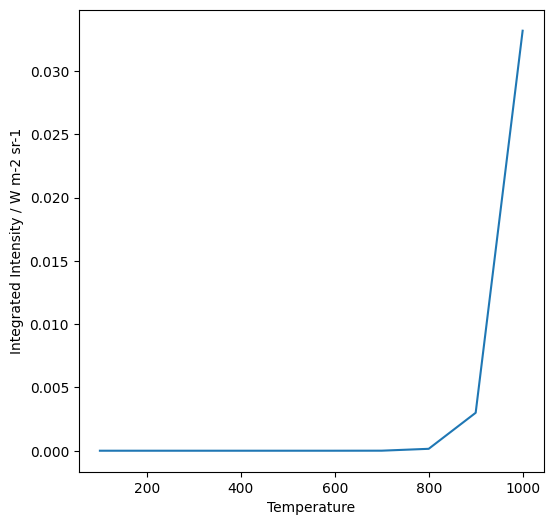

In [24]:
# Let's see if this works

# Let's define some new temperatures
T_couple_s = [100,200,300,400, 500, 600, 700, 800, 900, 1000]

################################################
#### REMINDER: Good Practice
# From now on, let's use capital letters for meta/global/fixed variables
################################################

# Let's define the bandwidth as 400 nm to 700 nm
LAMBDA_0_CAM = 400 * 10 **(-9)
LAMBDA_1_CAM = 700 * 10 **(-9)

# Let's call the integrated_B_blackbody function which returns a list of intensities at those points.
Blackbody_Integrated_Values = integrated_B_blackbody(T_couple_s, LAMBDA_0_CAM, LAMBDA_1_CAM, N)

# For plotting
# Define the axis and figure
fig, ax = plt.subplots(figsize=(6, 6))

# Could be useful to look at log scale plots sometimes
#ax.set_xscale('log')
#ax.set_yscale('log')
# Set the limits
#ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Integrated Intensity / W m-2 sr-1') 
# Plot the intensities
ax.plot(T_couple_s, Blackbody_Integrated_Values)

### 2.5 Check the expression for the Intensity before the integration
Before we move on, let's check if the expressions that we used for the Intensity seems alright.

In [25]:
# This function is based on the B_lambda_T_s_at_T function. 
# No integration is done in this function.
# We want to plot the intensities at each temperature, for a certain wavelength range

def B_lambda_T_s_at_T_plotter(some_T_couple_s, axis, lambda_0_s_for_plotting):
    '''
    Arguments:
    1. some_T_couple_s: a list/ numpy array of temperatures from a thermocouple
    2. axis: an axis object from matplotlib.pyplot on which we can plot the Blackbody radiation curves at each temperature
    3. lambda_0_s_for_plotting = a list of wavelengths at which the intensity values will be plotted

    Returns:
    axis: The same axis object that it received as input but, now with the Blackbody radiation curves plotted in

    Description:
    This function takes in a list/numpy array of thermocouple temperatures at various frames: some_T_couple_s
    plots the Blackbody radiation curves in the range (values) of lambda_0_s_for_plotting which is a list/numpy array of wavelengths
    on the axis object
    and returns the same axis object with plots plotted
    '''

    # For each temperature
    for i in range(np.size(some_T_couple_s)):
        # We did this in B_lambda_T_s_at_T function. 
        # At the current temperature, get the expression for the intensity, with the wavelength yet to be plugged in
        B_expression = (lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )
        # Make this expression which is a function into the format that it can be applied to an array of values
        B_expression_for_array = np.vectorize(B_expression)
        # Apply the expressions for B in terms of wavelength (functions) on the list/numpy array of wavelengths
        B_at_current_T = B_expression_for_array(lambda_0_s_for_plotting)
        # Plot the intensities at this temperature in a curve
        axis.plot(lambda_0_s_for_plotting, B_at_current_T, label='Temperature = '+str(some_T_couple_s[i]) + ' K')

    # Add legend to the curves
    axis.legend()
    return axis

/tmp/ipykernel_13682/1272156040.py:26: RuntimeWarning: overflow encountered in exp
  B_expression = (lambda a_lambda, i=i: ( (c_1_lambda / (a_lambda **5)) * (1 / (np.exp(c_2_lambda / (a_lambda * some_T_couple_s[i])) - 1) ) ) )


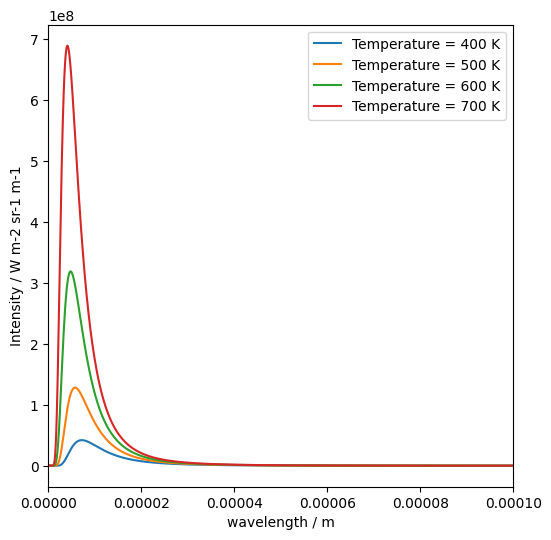

In [26]:
# Let's see if it works

# Define some temperatures
T_couple_s = [400, 500, 600, 700]
# Define wavelengths for plotting, here from 1 nm to 0.1 mm, spaced by orders of magnitude (in an exponential manner)
lambda_0_s_for_plotting = 10 ** np.linspace(-9, -4, 1000)
# Define a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
# Sometimes it can be useful to use log scales on the plots. Maybe not the best in this case.
#ax.set_xscale('log')
#ax.set_yscale('log')
# Define limits
ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('wavelength / m')
ax.set_ylabel('Intensity / W m-2 sr-1 m-1') 

# Call the function B_lambda_T_s_at_T_plotter, which returns an axis object with curves plotted in.
ax = B_lambda_T_s_at_T_plotter(T_couple_s, ax, lambda_0_s_for_plotting)
# Let's have a look at the figure
plt.show()

##### The curves do indeed look like Blackbody radiation curves. So, I think it is ok to move on.

## 2.6 Summary of Section 2
1. In section 2.1, we define the expressions that we will work with, based on lecture notes from a lecture from an Astronomy class at University of Oslo.
2. In section 2.2, we defined the constants. **From now on, we will try to use capital letters for global constants. We did not do this earlier and so that remains unchanged.**
3. In section 2.3, we tried using symbolic substitution to simplify integration, but found out that it might take a long time. So, we decided to do the integration directly. In section 2.3.1, we saw an 1-line example to read data from a csv file. The import procedure, in the real case will not be much more involved.
4. In section 2.4, we developed program to do the integration without using symbolic substitution. We saw that it is reasonably fast, and can do integration with 1000 integration/interpolation points in the same time that using symbolic substitution can do with only 10 integration/interpolation points. 
5. In section 2.5, we check to see if the expressions for the intensity we used in section 2.4 was correct, and the plot seems to look like Blackbody Radiation Curves. We will take this as to say that it is working and move on.

## Takeaways for the pipeline from Section 2.4
**The** integrated_B_blackbody **function, that calls the** B_lambda_T_s_at_T **function inside it.**

## 3. Experiment data
In this section, we will import and ready the experiment data for analysis.

### 3.1 Thermocouple temperature
In this section we will work with the data from the thermocouple

#### 3.1.1 Experiment 1- December 1, 2023
Here we will look at the data from the experiment done on December 1, 2023.

##### 3.1.1.1 Read the data from the excel file 

In [27]:
# Let's read the data from the sheet on 180 A 10 cm min-1 experiment into a pandas dataframe
df_180A_10cm_min_couple = pd.read_excel(open('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Measurement/231201_thermo_couples.xlsx','rb'), sheet_name='180A_10cm_min')

In [28]:
# Let's see what it looks like
df_180A_10cm_min_couple.head()

,t,thermo_1,thermo_2
0,0.1,22.37013,22.87360
1,0.2,22.38240,22.88587
2,0.3,22.38187,22.88587
3,0.4,22.38187,22.88427
4,0.5,22.38400,22.88640


In [29]:
# Let's get the temperature from thermocouple 1
T_couple1_10_cm_min = df_180A_10cm_min_couple['thermo_1'].to_numpy()
# Convert the temperature to Kelvin for blackbody radiation
T_couple1_10_cm_min = 273.15 + T_couple1_10_cm_min
# Let's get the temperature from thermocouple 2 and convert that to Kelvin
T_couple2_10_cm_min = df_180A_10cm_min_couple['thermo_2'].to_numpy()
T_couple2_10_cm_min = 273.15 + T_couple2_10_cm_min

In [30]:
# Let's see what it looks like
T_couple1_10_cm_min

array([295.52013, 295.5324 , 295.53187, ..., 476.16067, 476.1068 ,
       476.03107])

In [31]:
# Let's see the shape of the data
np.shape(T_couple2_10_cm_min)

(3000,)

In [32]:
# Let's read the data from the sheet on 180 A 20 cm min-1 experiment into a pandas dataframe
df_180A_20cm_min_couple = pd.read_excel(open('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Measurement/231201_thermo_couples.xlsx','rb'), sheet_name='180A_20_cm_min')

In [33]:
# Let's see what it looks like
df_180A_20cm_min_couple.head()

,t,thermo_1,thermo_2
0,0.1,22.09707,22.34027
1,0.2,21.77173,21.98773
2,0.3,21.77067,21.98773
3,0.4,21.77120,21.98987
4,0.5,21.77067,21.98880


In [34]:
# Let's get the temperature from thermocouple 1
T_couple1_20_cm_min = df_180A_20cm_min_couple['thermo_1'].to_numpy()
# Convert the temperature to Kelvin for blackbody radiation
T_couple1_20_cm_min = 273.15 + T_couple1_20_cm_min
# Let's get the temperature from thermocouple 2 and convert that to Kelvin
T_couple2_20_cm_min = df_180A_20cm_min_couple['thermo_2'].to_numpy()
T_couple2_20_cm_min = 273.15 + T_couple2_20_cm_min

In [35]:
# Let's see the shape of the data
np.shape(T_couple2_20_cm_min)

(1145,)

##### 3.1.1.2 Get the integrated blackbody intensity 

In [36]:
# Define the range for integration, i.e. the sensitivity bandwidth of the thermal camera. Here [400 nm, 700 nm]
LAMBDA_0 = 400 * (10 ** (-9))
LAMBDA_1 = 700 * (10 ** (-9))
N = 1000
# Get the blackbody integrated intensity using the integrated_B_blackbody from section 2
T_couple1_10_cm_min_Blackbody_integrated = integrated_B_blackbody(T_couple1_10_cm_min, LAMBDA_0, LAMBDA_1, N)

In [53]:
# Let's see what it looks like
T_couple1_10_cm_min_Blackbody_integrated

[4.636157775592007e-24,
 4.6497662898199164e-24,
 4.649177671585402e-24,
 4.649177671585402e-24,
 4.651543689925876e-24,
 4.653321750345378e-24,
 4.651543689925876e-24,
 4.651543689925876e-24,
 4.651543689925876e-24,
 4.652132599290643e-24,
 4.654511196816299e-24,
 4.6539108784915e-24,
 4.655100471316531e-24,
 4.655100471316531e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.655689818322892e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.655689818322892e-24,
 4.656290359664266e-24,
 4.657469419023057e-24,
 4.659249680830349e-24,
 4.658659895866631e-24,
 4.658659895866631e-24,
 4.659249680830349e-24,
 4.659249680830349e-24,
 4.659249680830349e-24,
 4.6598506684461465e-24,
 4.659249680830349e-24,
 4.661631814856742e-24,
 4.660440599922235e-24,
 4.6622219654827455e-24,
 4.663413622931766e-24,
 4.662812188719655e-24,
 4.6622219654827455e-24,
 4.663413622931766e-24,
 4.662812188719655e-24,
 4.662812188719655e-24,
 4.6640039927867195e-24,
 4.664594435278742e-24,
 4.6651960929

In [54]:
# See where the maximum value is
np.argmax(T_couple1_10_cm_min_Blackbody_integrated)

871

In [55]:
# Let's see what that maximum value is
T_couple1_10_cm_min_Blackbody_integrated[871]

21.320089457658952

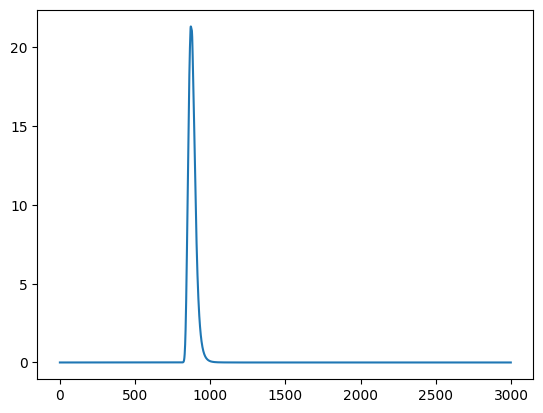

In [38]:
# This is what the integrated intensity would look like plotted against the frame number.
plt.plot(T_couple1_10_cm_min_Blackbody_integrated)

### 3.2 Thermal camera data (temperature and power)
In this section we will work with the data from the thermal camera

#### 3.2.1 Experiment 1- December 1, 2023
Here we will look at the data from the experiment done on December 1, 2023.

In [47]:
# Let's read the data from the sheet on 180 A 10 cm min-1 experiment into a pandas dataframe
df_180A_10cm_min_cam = pd.read_pickle('/home/kushik/Kushik/TU Chemnitz/WS 23 24/Research Project/Emissivity/GitHub/ResearchProject/Experiment Dec 1/Processed Data/180A_10cm_min.pkl')

In [49]:
# Let's see what it looks like
df_180A_10cm_min_cam

array([[[-582., -569., -596., ..., -582., -578., -596.],
        [-578., -573., -591., ..., -569., -569., -565.],
        [-582., -582., -587., ..., -587., -596., -582.],
        ...,
        [-582., -573., -582., ..., -578., -565., -573.],
        [-591., -587., -582., ..., -565., -556., -569.],
        [-587., -578., -582., ..., -556., -573., -573.]],

       [[-587., -591., -573., ..., -573., -591., -582.],
        [-587., -565., -587., ..., -569., -573., -578.],
        [-582., -582., -600., ..., -573., -578., -578.],
        ...,
        [-587., -582., -573., ..., -565., -578., -565.],
        [-582., -582., -578., ..., -551., -556., -560.],
        [-573., -578., -591., ..., -573., -556., -569.]],

       [[-587., -582., -578., ..., -582., -591., -569.],
        [-578., -578., -600., ..., -565., -582., -582.],
        [-591., -587., -609., ..., -587., -587., -587.],
        ...,
        [-573., -591., -587., ..., -565., -556., -582.],
        [-587., -578., -569., ..., -560., -57

In [50]:
# Let's see the shape of the data
np.shape(df_180A_10cm_min_cam)

(8189, 100, 200)

In [58]:
my_max_frame_approx = int(8189 * 871/3000.0)

In [59]:
all_pixels_at_max_frame = df_180A_10cm_min_cam[my_max_frame_approx]

In [64]:
np.shape(df_180A_10cm_min_cam[my_max_frame_approx])

(100, 200)

In [66]:
my_max_pixel_value = np.max(all_pixels_at_max_frame.flatten())

In [67]:
my_max_pixel_value

16817.0

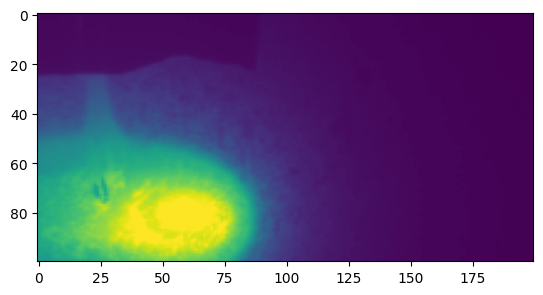

In [68]:
# Make a color plot
plt.imshow(all_pixels_at_max_frame)

## 4. Emissivity Models

### 4.1 Integration with Emissivity

In [39]:
# We will first define a slight variation of the trapezoidal function that multiplies the values of ...
# the intensity of a blackbody and the emissivity, at wavelengths of interpolation x_k ...
# So that it does integration of: Blackbody intensity * emissivity
def trapezoidal_multiplier(f_s, x_0, x_N, N):
    '''
    Arguments:
    f_s : a list of functions of wavelength. The model to have in mind for now is [B_of_lambda, epsilon_of_lambda]
    x_0, x_N: The range integration, for the wavelengeths here.
    N: number of interpolation/integration points

    Retuns:
    The integration of :B_of_lambda * epsilon_of_lambda, d_wavelength 
    by using interpolated values of B_of_lambda(x_k) * epsilon_of_lambda(x_k) for x_k being the wavelengths used for integration

    Description:
    This function is a slight adjustment of the trapezoidal function.
    '''

    delta_x = float(x_N - x_0) / N
    sum = 0.0

    # For x_0
    prod = 1.0
    # For each of the functions, multiply the value of the functions at x_0 together,
    # Then add that value to the sum as the trapezoidal function would do.
    for one_such_f in f_s:
        prod = prod * (one_such_f(x_0))
    sum += prod/2.0

    # For x_1 to x_{N-1}
    for i in range(1, N):
        x_k = x_0 + i * delta_x
        
        prod = 1.0
        for one_such_f in f_s:
            prod = prod * (one_such_f(x_k))
        sum += prod

    # For x_N
    prod = 1.0
    for one_such_f in f_s:
        prod = prod * (one_such_f(x_N))
    sum += prod/2.0
    
    sum = sum * delta_x
    
    return sum

In [40]:
# Let's see if it works

# Define a dummy expression for emissivity as the product of the wavelength and the temperature
term_of_T_couple_then_lambda = lambda T_couple: (lambda lambda_: lambda_ * T_couple)
# Define some temperatures
T_couple_s = [400, 500, 600, 700]
# Get the intensity as functions of wavelengths at various temperatures
T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
# Define an empty list to hold the integrated intensity values
B_lambda_T_s_integrated = []

# For each of the functions of wavelengths at various temperatures
for i in range(np.size(T_couple_s_at_T)):
    # Get the emissivity at this temperature, as a function of the wavelength
    emissivity_at_T = term_of_T_couple_then_lambda(T_couple_s[i])
    # Append the expression for blackbody intensity and the emissivity to the list of functions to be multiplied
    # Both are functions of wavelength at this temperature
    functions_to_be_multiplied = [T_couple_s_at_T[i], emissivity_at_T]
    # Call the trapezoidal function and append the result of integration at this temperature to the B_lambda_T_s_integrated array
    B_lambda_T_s_integrated.append(trapezoidal_multiplier(functions_to_be_multiplied, lambda_0, lambda_1, N))

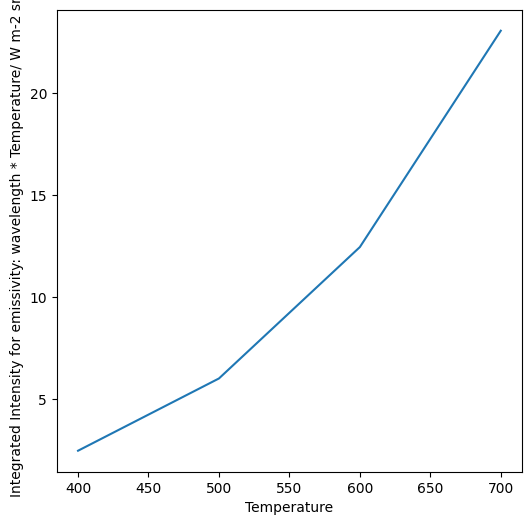

In [41]:
# Let's plot and see what it looks like
# Define the axis and figure
fig, ax = plt.subplots(figsize=(6, 6))

# Could be useful to look at log scale plots sometimes
#ax.set_xscale('log')
#ax.set_yscale('log')
# Set the limits
#ax.set_xlim([0, 10**(-4)])
# Set the labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Integrated Intensity for emissivity: wavelength * Temperature/ W m-2 sr-1') 
# Plot the intensities
ax.plot(T_couple_s, B_lambda_T_s_integrated)

In [42]:
# Let's make this into a function
def integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, emissivity_of_T_couple_then_lambda):
    '''
    Arguments:
    1. T_couple_s : This is the list of thermocouple temperature data at each frame, and is close to the directly read data  from a thermocouple
    2., 3. (lambda_0, lambda_1): The bandwidth for integration, upper and lower wavelength values
    4. N: Number of points for integration with the trapezoidal rule
    N = 1000 is reasonable for now
    5. emissivity_of_T_couple_then_lambda: is an emissivity function of Temperature that returns a function of the wavelength at that temperature
    This is theoretically an emissivity of a temperature and wavelength, where the temperature is evaluated first and then wavelength 

    Returns: 
    B_lambda_T_s_integrated: A list of The intensity at each temperature, for a non black body; since here we multiply by emissivity
    
    Description:
    This function passes in intensity at a certain temperature and the emissivity at the same temperature to the trapezoidal_multiplier ...
    function where intensity_at_T * emissivity_at_T will be integrated ...
    for each temperature in T_couple_s
    
    Just like integrated_B_blackbody function integrates the intensity using trapezoidal function
    this function integrates the intensity for a non black body which is a product of the intensity for blackbody and emissivity, using ...
    trapezoidal_multiplier function
    '''
    
    # Get the intensity as functions of wavelengths at various temperatures
    T_couple_s_at_T = B_lambda_T_s_at_T(T_couple_s)
    # Define an empty list to hold the integrated intensity values
    B_lambda_T_s_integrated = []
    
    # For each of the functions of wavelengths at various temperatures
    for i in range(np.size(T_couple_s_at_T)):
        # Get the emissivity at this temperature, as a function of the wavelength
        # This means evaluate the emissivity at this temperature
        emissivity_at_T = emissivity_of_T_couple_then_lambda(T_couple_s[i])
        # Append the expression for blackbody intensity and the emissivity to the list of functions to be multiplied
        # Both are functions of wavelength at this temperature
        functions_to_be_multiplied = [T_couple_s_at_T[i], emissivity_at_T]
        # Call the trapezoidal function and append the result of integration at this temperature to the B_lambda_T_s_integrated array
        B_lambda_T_s_integrated.append(trapezoidal_multiplier(functions_to_be_multiplied, lambda_0, lambda_1, N))

    return B_lambda_T_s_integrated

#### 4.1.1 A test for Integration with Emissivity
A test that we can do to check whether this is working is to compare the intensities we get from using the functions in Section 2 which are intensities for a blackbody, and using the functions in Section 4.1 but using emissivity = 1.

In [43]:
# Define emissivity = 1
Blackbody_term_of_T_couple_then_lambda = lambda T_couple: (lambda lambda_: 1)
# Define some temperatures
T_couple_s = np.linspace(100,1000,1000)
# Define the bandwidth: [400 nm, 700 nm] and the number of integration points: 1000
lambda_0 = 400 * (10**(-9))
lambda_1 = 700 * (10**(-9))
N = 1000

# Get the integrated B with emissvity = 1 using the integrated_B_non_Blackbody function in section 4.1
B_lambda_T_s_integrated_with_emissivity = integrated_B_non_Blackbody(T_couple_s, lambda_0, lambda_1, N, Blackbody_term_of_T_couple_then_lambda)
# Get the integrated B without emissivity using the integrated_B_blackbody function in section 2
B_lambda_T_s_integrated_without_emissivity = integrated_B_blackbody(T_couple_s, lambda_0, lambda_1, N)
# Get the difference of the intensities
difference_in_B_s = np.array(B_lambda_T_s_integrated_with_emissivity) - np.array(B_lambda_T_s_integrated_without_emissivity)
# Get the mean
print(f'The mean difference is: {np.mean(difference_in_B_s)}')
# Get the maximum difference
print(f'The maximum difference is: {np.max(difference_in_B_s)}')
# Get the mean of the difference divided by the mean of B_lambda_T_s_integrated_without_emissivity
print(f'The mean difference divided by the mean value using section 2 is: {np.mean(difference_in_B_s)/np.mean(B_lambda_T_s_integrated_without_emissivity)}')
# Get the maximum difference divided by the maximum of B_lambda_T_s_integrated_without_emissivity
print(f'The maximum difference divided by the maximum value using section 2is: {np.max(difference_in_B_s)/np.max(B_lambda_T_s_integrated_without_emissivity)}')

The mean difference is: 0.0
The maximum difference is: 0.0
The mean difference divided by the mean value using section 2 is: 0.0
The maximum difference divided by the maximum value using section 2is: 0.0


In [44]:
# Let's have a look that whether the first ten elements indeed they look identical
print(B_lambda_T_s_integrated_with_emissivity[:10])

[1.3322011138879443e-83, 8.424100213151713e-83, 5.1562796324785716e-82, 3.0575982983353173e-81, 1.7579815779703465e-80, 9.808094976544041e-80, 5.3140561669364147e-79, 2.798092684133329e-78, 1.432864122625011e-77, 7.140965676030899e-77]


In [45]:
print(B_lambda_T_s_integrated_without_emissivity[:10])

[1.3322011138879443e-83, 8.424100213151713e-83, 5.1562796324785716e-82, 3.0575982983353173e-81, 1.7579815779703465e-80, 9.808094976544041e-80, 5.3140561669364147e-79, 2.798092684133329e-78, 1.432864122625011e-77, 7.140965676030899e-77]


The first ten elements indeed look identical

In [46]:
# Let's look at the difference
print(difference_in_B_s[np.where(difference_in_B_s!=0)])

[]


All the differences seem to be zero

##### Things seem to be working.

### 4.2 Polynomial model for emissivity

Here we discuss models of the following kind:

Consider 
$\varepsilon = \sum_{i \in \mathbb{N}} a_i \lambda^{\displaystyle \left(\frac{m_i}{n_i}\right)} T^{\displaystyle \left(\frac{k_i}{l_i}\right)} $ where {$m,n,k,l$} $ \in \mathbb{R}$

An example may be 
$\varepsilon = a_0 + a_1 \lambda + a_2 \sqrt{\lambda T} + a_3 \left(\frac{\lambda}{T}\right)^2 + a_4 \frac{T}{\lambda} + a_5 T^2$

In such cases, we will do the following procedure.
$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \sum_{i} a_i \int_{\lambda_0}^{\lambda_1} B(\lambda, T) \lambda^{\displaystyle \left(\frac{m_i}{n_i}\right)} T^{\displaystyle \left(\frac{k_i}{l_i}\right)} d \lambda$

So in the above example,  
$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \left( a_0 + a_1 \lambda + a_2 \sqrt{\lambda T} + a_3 \left(\frac{\lambda}{T}\right)^2 + a_4 \frac{T}{\lambda} + a_5 T^2 \right) d \lambda$
$= \displaystyle a_0 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) d \lambda + a_1 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \lambda d \lambda + a_2  \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \sqrt{\lambda T} d \lambda + a_3  B(\lambda, T) \int_{\lambda_0}^{\lambda_1} \left(\frac{\lambda}{T}\right)^2 d \lambda + a_4 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \frac{T}{\lambda} d \lambda + a_5 \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) T^2 d \lambda $

We can solve each of the integrals using the **integrated_B_non_Blackbody** function in section 4.1.
Then we get,

integrated_B$(T_j) = \sum_{i} a_i$ integrated_B_i$(T_j)$

or in this case

integrated_B$(T_j) = a_0 $ integrated_B_0$(T_j)$ + $ a_1 $ integrated_B_1$(T_j)$ + $ a_2 $ integrated_B_2$(T_j)$ + $ a_3 $ integrated_B_3$(T_j)$ + $ a_4 $ integrated_B_4$(T_j)$ + $ a_5 $ integrated_B_5$(T_j)$

The left hand side of the equation is a value we compute based on the data from the thermal camera. 

We have not taken into account the Area and the solid angle, so we will need to multiply with those factors later, but let's say that the left hand side is representative of the quantity also obtained from the right hand side, in this case Intensity with units $W m^{-2} sr^{-1} m^{-1}$ 

We have $j$ many equations for the temperatures that we have. We use $i$ many of those equations to get the coefficients $a_i$. Then we can plug in the $a_i$ 's in the remaining $j - i$ many equations and get the difference between the left and the right hand sides. We can also solve $j$ many equations in different combinations to see which combinations give the least difference between the left and the right hand sides on the remaining $j - i$ many equations, when the values of $a_i$ are plugged in.

Let's say we have/use 1000 frames of data from the thermocouple. In the above example, we have 6 coefficients to solve for. So, we use the 6 equations to solve for the coefficients $a_0$ to $a_5$ and use the remaining 994 equations to check the error.

#### WARNING! We cannot use emissivity models of the following kind with the integrated_B_non_Blackbody function in section 4.1.
Consider

$\varepsilon =$ exp$(a_0 \lambda +a_1 \lambda^2)$ 

or 

$\displaystyle \varepsilon = \frac{1}{(a_0+a_1 \lambda)}$ 

which have been commonly used in the literature. Here

$\displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) \varepsilon(\lambda,T) d \lambda = \displaystyle \int_{\lambda_0}^{\lambda_1}  B(\lambda, T) $ exp$(a_0 \lambda)$ exp$(a_1 \lambda^2) d \lambda$

Here we will need to pass in the coefficients $a_i$ into the integration. That means we have to make sums of symbolic expressions.
For example, approximation of $\int_{1}^{2}$ exp$( a_0 \lambda)$ with 3 interpolation points, would result in a sum of the form $c_0$ exp$(a_0) + c_1$ exp$(1.5 a_0) + c_2$ exp$(2 a_0)$ which with 1000 points is a really long expression. This will be the case for values at each temperature (frame). I think this might take a lot of time, but we could try it.

**One idea could be to do symbolic substitution with 10 integration points. get a rough value of coefficients.
Then plug in those coefficient into caculating the integration without symbolic substitution as above.
We can then check errors in those values and adjust the coefficients some reasonable the adjustible range and choose the values with the lowest errors.
However, we will need to build the program to integrate using symbolic substitution, for non-blackbody cases.**